In [1]:
library(data.table)
library(ggplot2)

th <- fread("Th_giniIndex_hiseq.csv")
tc <- fread("Tc_giniIndex_hiseq.csv")

df <- rbind(cbind(th, type="T4"), cbind(tc, type="T8"))
df$disease = "SLE";
df$disease[grep("IGTB",df$sample)] = "Ctrl";

plot = ggplot(aes(disease, gini, color=type),data=df)+geom_boxplot()+theme_bw()
ggsave(plot, file="figures.V6/gini.png", height=3, width=3)


th_clones <- fread("Th_sharedclones_hiseq_CDR3.csv")
tc_clones <- fread("Tc_sharedclones_hiseq_CDR3.csv")

tcr <- fread("TCR_paired_final_hiseq.csv")


In [14]:
lineage <- fread("TCR_gini_lymphlineage.csv")
lineage$disease = "SLE";
lineage$disease[grep("IGTB",lineage$Sample_ID)] = "Ctrl";

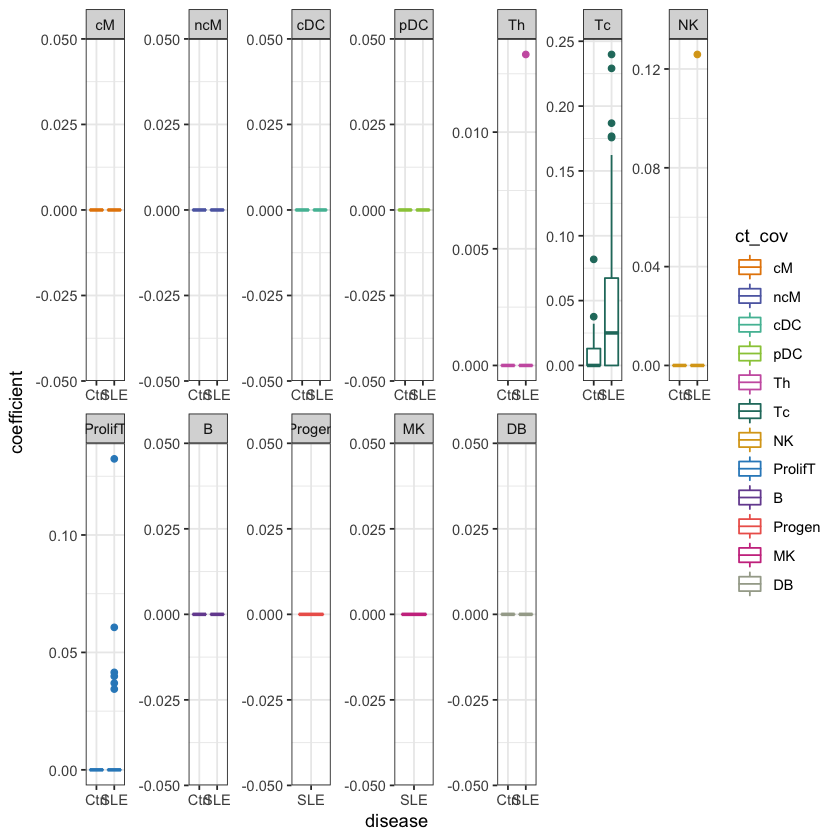

In [39]:
lineage_colors = c("#E58606","#5D69B1","#52BCA3","#99C945","#CC61B0","#24796C","#DAA51B","#2F8AC4","#764E9F","#ED645A","#CC3A8E","#A5AA99");

lineage <- fread("TCR_gini_lymphlineage.csv")
lineage$disease = "SLE";
lineage$disease[grep("IGTB",lineage$Sample_ID)] = "Ctrl";
lineage$ct_cov = factor(lineage$ct_cov, levels=c('cM', 'ncM', 'cDC', 'pDC', 'Th', 'Tc', 'NK', 'ProlifT', 'B', 'Progen', 'MK', 'DB'))

plot = ggplot(aes(disease, coefficient, color=ct_cov),data=lineage)+geom_boxplot()+theme_bw()+facet_wrap(~ct_cov,ncol=7, scales="free")+scale_color_manual(values=lineage_colors)
ggsave(plot, file="figures.V6/gini_lineage.png", height=6, width=15)
plot

In [44]:
anova(lm(lineage[lineage$ct_cov=="Tc",]$coefficient~lineage[lineage$ct_cov=="Tc",]$disease))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
"lineage[lineage$ct_cov == ""Tc"", ]$disease",1,0.02098937,0.02098937,7.829986,0.006155195
Residuals,101,0.27074459,0.00268064,NA,NA


In [45]:
anova(lm(lineage[lineage$ct_cov=="Th",]$coefficient~lineage[lineage$ct_cov=="Th",]$disease))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
"lineage[lineage$ct_cov == ""Th"", ]$disease",1,4.155952e-07,4.155952e-07,0.2391665,0.6258691
Residuals,101,1.755058e-04,1.737682e-06,NA,NA


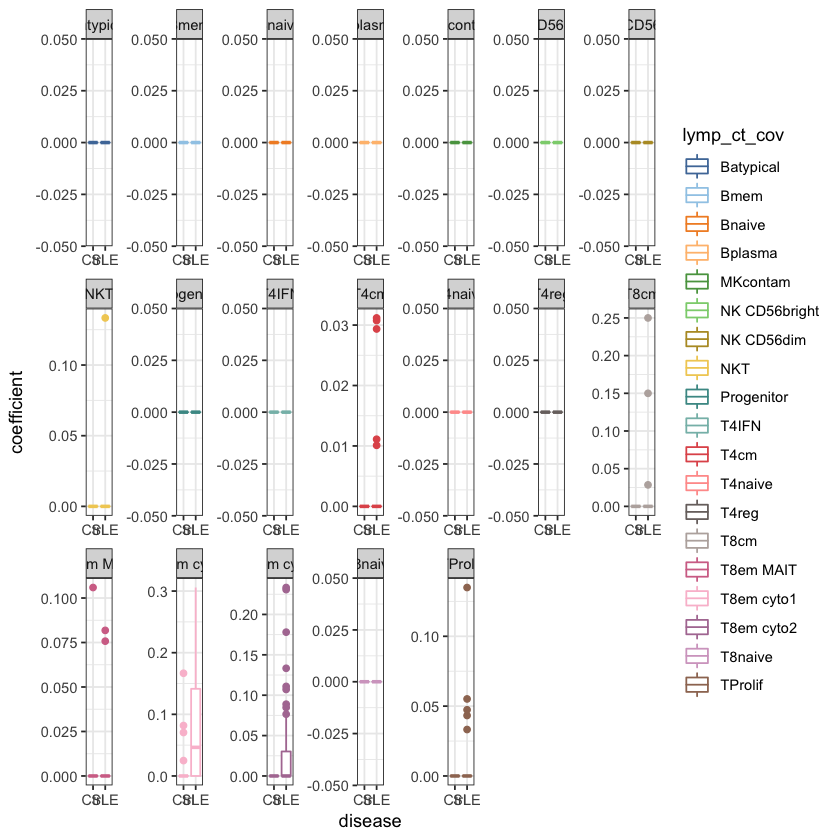

In [37]:
colors <- c("#4E79A7","#A0CBE8","#F28E2B","#FFBE7D","#59A14F","#8CD17D","#B6992D","#F1CE63","#499894","#86BCB6","#E15759","#FF9D9A","#79706E","#BAB0AC","#D37295","#FABFD2","#B07AA1","#D4A6C8","#9D7660","#D7B5A6");

high_res <- fread("TCR_gini_highreslymph.csv")
##high_res <- high_res[which(high_res$cell_count>),]
high_res$disease = "SLE";
high_res$disease[grep("IGTB",high_res$Sample_ID)] = "Ctrl";
high_res$lymp_ct_cov = factor(high_res$lymp_ct_cov, levels=c('Batypical', 'Bmem', 'Bnaive', 'Bplasma', 'MKcontam', 'NK CD56bright',
       'NK CD56dim', 'NKT', 'Progenitor', 'T4IFN', 'T4cm', 'T4naive', 'T4reg',
       'T8cm', 'T8em MAIT', 'T8em cyto1', 'T8em cyto2', 'T8naive', 'TProlif'))

plot = ggplot(aes(disease, coefficient, color=lymp_ct_cov),data=high_res)+geom_boxplot()+theme_bw()+facet_wrap(~lymp_ct_cov, ncol=7, scales="free")+scale_color_manual(values=colors)
ggsave(plot, file="figures.V6/gini_high_res.png", height=6, width=15)
plot

In [47]:
high_res

Sample_ID,lymp_ct_cov,coefficient,cell_count,disease
1004_1004,Bmem,0.00000000,1,SLE
1004_1004,MKcontam,0.00000000,15,SLE
1004_1004,NK CD56bright,0.00000000,1,SLE
1004_1004,NK CD56dim,0.00000000,1,SLE
1004_1004,NKT,0.00000000,3,SLE
1004_1004,Progenitor,0.00000000,2,SLE
1004_1004,T4cm,0.00000000,113,SLE
1004_1004,T4IFN,0.00000000,7,SLE
1004_1004,T4naive,0.00000000,96,SLE
1004_1004,T4reg,0.00000000,16,SLE


In [51]:
anova(lm(high_res[high_res$lymp_ct_cov=="T8em cyto1",]$coefficient~high_res[high_res$lymp_ct_cov=="T8em cyto1",]$disease))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
"high_res[high_res$lymp_ct_cov == ""T8em cyto1"", ]$disease",1,0.05475966,0.054759660,8.597934,0.004180662
Residuals,99,0.63052429,0.006368932,NA,NA


In [52]:
anova(lm(high_res[high_res$lymp_ct_cov=="T8em cyto2",]$coefficient~high_res[high_res$lymp_ct_cov=="T8em cyto2",]$disease))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
"high_res[high_res$lymp_ct_cov == ""T8em cyto2"", ]$disease",1,0.008788223,0.008788223,4.504193,0.03628185
Residuals,100,0.195112047,0.001951120,NA,NA


In [53]:
anova(lm(high_res[high_res$lymp_ct_cov=="TProlif",]$coefficient~high_res[high_res$lymp_ct_cov=="TProlif",]$disease))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
"high_res[high_res$lymp_ct_cov == ""TProlif"", ]$disease",1,0.0002038499,0.0002038499,0.7359976,0.3931999
Residuals,91,0.0252043461,0.0002769708,NA,NA


In [54]:
anova(lm(high_res[high_res$lymp_ct_cov=="T4cm",]$coefficient~high_res[high_res$lymp_ct_cov=="T4cm",]$disease))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
"high_res[high_res$lymp_ct_cov == ""T4cm"", ]$disease",1,2.960451e-05,2.960451e-05,1.048268,0.3083524
Residuals,101,2.852378e-03,2.824136e-05,NA,NA


In [55]:
anova(lm(high_res[high_res$lymp_ct_cov=="T8cm",]$coefficient~high_res[high_res$lymp_ct_cov=="T8cm",]$disease))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
"high_res[high_res$lymp_ct_cov == ""T8cm"", ]$disease",1,0.0004832364,0.0004832364,0.5388785,0.4647446
Residuals,93,0.0833972371,0.0008967445,NA,NA


In [56]:
anova(lm(high_res[high_res$lymp_ct_cov=="T8em MAIT",]$coefficient~high_res[high_res$lymp_ct_cov=="T8em MAIT",]$disease))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
"high_res[high_res$lymp_ct_cov == ""T8em MAIT"", ]$disease",1,0.0002648859,0.0002648859,0.7364792,0.3940966
Residuals,62,0.0222992355,0.0003596651,NA,NA
